# 第11回演習「機械学習モデルの評価」その2


この演習では「回帰問題に関する評価方法」と「過学習の考え方」を習得します。<br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
<hr />

## 14) ボストンの住宅データを読み込む


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

住宅データ=load_boston()
説明変数X=住宅データ.data
目的変数y=住宅データ.target

# 概要説明を見る
print(住宅データ.DESCR)

/home/yori/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.0.0' currently installed).
  warnings.warn(msg, UserWarning)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

/home/yori/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 15) データ全体を眺める

In [2]:
住宅のデータフレーム = pd.DataFrame(説明変数X, columns=住宅データ.feature_names)
住宅のデータフレーム # print関数は使わなくてよい

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## 16) 目的変数を表示する

In [3]:
print(目的変数y) # 地域ごとの住宅価格($1,000単位)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## 17) 散布図行列を描く(注:表示までに10数秒待たされます)

In [ ]:
sns.pairplot(住宅のデータフレーム)
plt.show()

## 18) 線形回帰で住宅価格を予測

In [4]:
部屋数X=住宅データ.data[:,[5,]] # 部屋数を説明変数とし、単回帰
線形回帰=LinearRegression()
線形回帰.fit(部屋数X,目的変数y)
予測されたy=線形回帰.predict(部屋数X)

print(線形回帰.coef_) # 係数
print(線形回帰.intercept_) # 切片

[9.10210898]
-34.67062077643857


## 19) 線形回帰の結果を可視化

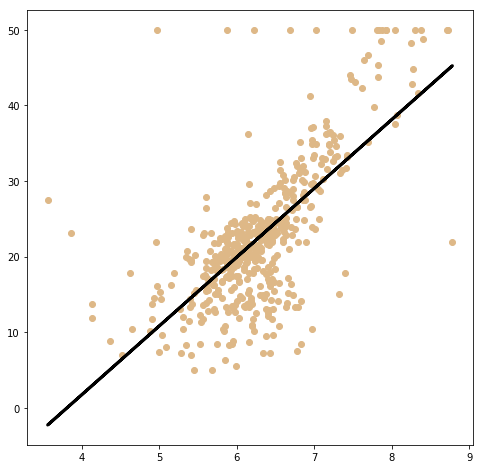

In [5]:
plt.figure(figsize = (8, 8)) # 図示の準備
plt.scatter(部屋数X,目的変数y,color='burlywood',marker='o')
plt.plot(部屋数X,予測されたy,color='k',linewidth=3.0)

## 20) 平均二乗誤差

In [6]:
# from sklearn.metrics import mean_squared_error の機能
print(mean_squared_error(目的変数y,予測されたy))

43.60055177116956


## 21) 決定係数

In [7]:
# from sklearn.metrics import r2_score の機能
print(r2_score(目的変数y,予測されたy))

0.48352545599133423


## 22) サポートベクタマシンでも回帰

In [8]:
# from sklearn.svm import SVR の機能
SVRで回帰=SVR(kernel='linear',C=0.005)
SVRで回帰.fit(部屋数X,目的変数y)
SVRで予測されたy=SVRで回帰.predict(部屋数X)
print(SVRで回帰.coef_) # 係数
print(SVRで回帰.intercept_) # 切片

[[0.857205]]
[15.97033881]


## 23) SVMで回帰させた結果を図示

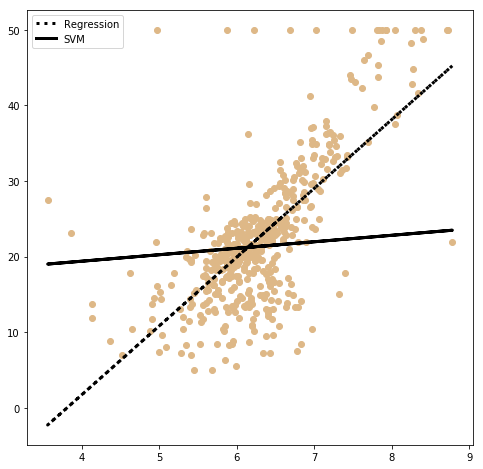

In [9]:
plt.figure(figsize = (8, 8)) # 図示の準備
plt.scatter(部屋数X,目的変数y,color='burlywood',marker='o')
plt.plot(部屋数X,予測されたy,color='k',label='Regression',linewidth=3,linestyle=':')
plt.plot(部屋数X,SVRで予測されたy,color='k',label='SVM',linewidth=3,linestyle='-')
plt.legend() # 凡例を表示

## 24) SVMでの平均二乗誤差、決定係数を表示

In [10]:
print(mean_squared_error(目的変数y,SVRで予測されたy))
print(r2_score(目的変数y,SVRで予測されたy))

78.47441145564989
0.07042378533142124


## 25) SVMでのパラメータを変えて再挑戦

In [11]:
SVRで非線形回帰=SVR(kernel='rbf',C=10) # rbfカーネルで非線形回帰
SVRで非線形回帰.fit(部屋数X,目的変数y)
SVRで予測されたy=SVRで非線形回帰.predict(部屋数X)
print(mean_squared_error(目的変数y,SVRで予測されたy))
print(r2_score(目的変数y,SVRで予測されたy))

35.49466234079474
0.5795445515594269


## 26) 学習データとテストデータに分け、過学習の問題を見る

In [12]:
学習データX,テストデータX=部屋数X[:350],部屋数X[350:] # 学習データとテストデータ(X)
学習データy,テストデータy=目的変数y[:350],目的変数y[350:] # 学習データとテストデータ(y)
SVRで非線形回帰=SVR(kernel='rbf',C=10) # 前のプログラムと同様、非線形回帰
SVRで非線形回帰.fit(学習データX,学習データy) # 学習データで学習
学習データで予測されたy=SVRで非線形回帰.predict(学習データX) # 学習データでの予測結果
テストデータで予測されたy=SVRで非線形回帰.predict(テストデータX) # テストデータでの予測結果

print("-------------- 学習データとテストデータの予測結果比較---------------")
print(mean_squared_error(学習データy,学習データで予測されたy)) # 学習データでの平均二乗誤差
print(r2_score(学習データy,学習データで予測されたy)) # 学習データでの決定係数               
print(mean_squared_error(テストデータy,テストデータで予測されたy)) # テストデータでの平均二乗誤差
print(r2_score(テストデータy,テストデータで予測されたy)) # テストデータでの決定係数

# 平均二乗誤差は小さい方が、決定係数は大きい方が予測がうまくいっている。

-------------- 学習データとテストデータの予測結果比較---------------
11.698637680415914
0.8365898862526266
96.15709383027887
-0.44819063229529066


## 27) 学習データとテストデータをランダムに分割 (医療データ編)

In [13]:
医療データ=load_breast_cancer()
説明変数X=医療データ.data
目的変数y=医療データ.target

説明変数X_学習用,説明変数X_テスト用,目的変数y_学習用,目的変数y_テスト用=train_test_split(
    説明変数X,目的変数y,test_size=0.2,random_state=2) # 2割をテスト用

# 学習データで学習させ、テストデータで検証
SVCで分類=SVC()
SVCで分類.fit(説明変数X_学習用,目的変数y_学習用) # 学習
予測された目的変数y_学習用=SVCで分類.predict(説明変数X_学習用) # 学習データについて予測
予測された目的変数y_テスト用=SVCで分類.predict(説明変数X_テスト用) # テストデータについて予測
print("-------------- 学習データとテストデータの予測結果比較---------------")
print(accuracy_score(目的変数y_学習用,予測された目的変数y_学習用))
print(accuracy_score(目的変数y_テスト用,予測された目的変数y_テスト用)) # テストデータでの正解率が悪い

-------------- 学習データとテストデータの予測結果比較---------------
1.0
0.6052631578947368


## 28) 交差検証

In [15]:
交差検証=KFold(5,shuffle=True)
分類モデル=SVC(kernel='rbf',C=1) # 非線形SVMで分類
#分類モデル=SVC(kernel='linear',C=1) # 線形SVMで
#分類モデル=LogisticRegression() # ロジスティック回帰で
#分類モデル=RandomForestClassifier() # ランダムフォレストで
print("交差検証の結果")
print(cross_val_score(分類モデル,説明変数X,目的変数y,
                      cv=交差検証,scoring='accuracy')) # 正解率5回分

交差検証の結果
[0.65789474 0.6754386  0.57894737 0.57017544 0.65486726]


## 29) 正解率でなく、F値も5回分

In [16]:
print(cross_val_score(分類モデル,説明変数X,目的変数y,
                      cv=交差検証,scoring='f1')) # F値を5回分

[0.77419355 0.69714286 0.80628272 0.79365079 0.77837838]


## 任意課題) 
<span style="background-color:#FFFF99">交差検証で線形SVM、ロジスティック回帰、ランダムフォレストを試してみましょう。<br />ランダムフォレストは初めて登場する手法ですが、プログラム番号28番のコメント部分にヒントがあります。</span><hr />


第11回第4章の演習はここまでです。お疲れさまでした。